[ZM] Exercises 14.4, Q3

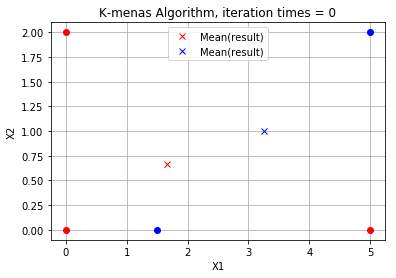

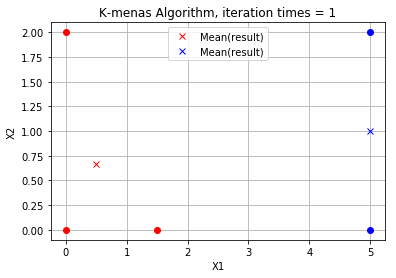

iteration times = 2

Mean(result)
[ 0.5         0.66666667]
[ 5.  1.]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
points = [[0.0,2.0],[0.0,0.0],[1.5,0.0],[5.0,0.0],[5.0,2.0]]
c1 = [points[i-1] for i in [1,2,4]]
c2 = [points[i-1] for i in [3,5]]
def plot(c1,c2,times) :   
    for i in c1 :
        plt.plot(i[0],i[1],'ro')
    for i in c2 :
        plt.plot(i[0],i[1],'bo')   
    plt.plot((np.sum(np.array(c1),axis=0)/len(c1))[0],(np.sum(np.array(c1),axis=0)/len(c1))[1],'rx',label='Mean(result)')
    plt.plot((np.sum(np.array(c2),axis=0)/len(c2))[0],(np.sum(np.array(c2),axis=0)/len(c2))[1],'bx',label='Mean(result)')
    plt.legend(loc='upper center')
    plt.title("K-menas Algorithm, iteration times = %d" %times)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid()
    plt.show()
count = 0
while True :
    plot(c1,c2,count)
    center = [np.sum(np.array(c1),axis=0)/len(c1),np.sum(np.array(c2),axis=0)/len(c2)]
    c1 , c2 = [] , []
    for i in range(len(points)) :
        if np.linalg.norm(points[i]-center[0]) < np.linalg.norm(points[i]-center[1]) : # belongs to c1
            c1.append(points[i])
        else : # belongs to c2
            c2.append(points[i])
    temp = [list(np.sum(np.array(c1),axis=0)/len(c1)),list(np.sum(np.array(c2),axis=0)/len(c2))]
    count += 1
    if [list(center[0]),list(center[1])] == temp :
        break
print "iteration times = %d\n" % count 
print "Mean(result)"
for i in center :
    print i


In [1]:
import numpy as np
import matplotlib.pyplot as plt
temp = [[0.5,4.5],[2.2,1.5],[3.9,3.5],[2.1,1.9],[0.5,3.2],[0.8,4.3],[2.7,1.1],[2.5,3.5],[2.8,3.9],[0.1,4.1]]
points = []
for i in range(len(temp)) :
    points.append(np.matrix([temp[i]]).T)
#---------------------------2D Gaussain------------------------------------------#
def gaussain_2D(point,u,sigma) :  
    '''
    Input :
        point : npmatrix - 2x1
        u : npmatrix - 2x1
        sigma : npmatrix 2x2
    output :
        probability : npfloat - probability of one point
    '''
    exp = np.exp(-(point.T-u.T)*np.linalg.inv(sigma)*(point-u)/2)
    return (float(exp) / (2*np.pi * np.sqrt(np.absolute(np.linalg.det(sigma)))))
#---------------------------Log Likelihood function------------------------------#
def loglikelihood(points,u,sigma,p) :
    '''
    Input :
        point : npmatrix - [2x1] * len(points)
        u : npmatrix - [2x1] * len(model)
        sigma : npmatrix [2x2] * len(model)
        p : float [x] * len(model)
    output :
        mixture_probability : npfloat 
    '''
    mixture_probability = 0.0
    for i in range(len(points)) :
        temp = 0
        for j in range(len(u)) :
            temp += p[j] * gaussain_2D(points[i],u[j],sigma[j])
        mixture_probability += np.log(temp)
    return mixture_probability 
#---------------------------Estimate step----------------------------------------#
def Estimation(points,u,sigma,p) :
    '''
    Input :
        point : npmatrix - [2x1] * len(points)
        u : npmatrix - [2x1] * len(model)
        sigma : npmatrix [2x2] * len(model)
        p : float [x] * len(model)
    output :
        beta : npmatrix [x]  len(model) x len(points)
    '''
    beta = []
    for i in range(len(points)) :
        temp = []
        sum = 0
        for j in range(len(u)) :
            sum += p[j]*gaussain_2D(points[i],u[j],sigma[j])
            temp.append(p[j]*gaussain_2D(points[i],u[j],sigma[j]))
        beta.append(np.matrix(temp/sum))
    return beta
#---------------------------Maximization step------------------------------------#
def Maximization(points,u,sigma,beta) :
    '''
    Input :
        point : npmatrix - [2x1] * len(points)
        u : npmatrix - [2x1] * len(model)
        sigma : npmatrix [2x2] * len(model)
        beta : list of npmatrix (length of model) x (len of points)
    output :
        u : npmatrix - [2x1] * len(model)
        sigma : npmatrix [2x2] * len(model)
        p : float [x] * len(model)
    '''
    count = 1  # run 100 times
    old_mle = 0
    while True :
        new_mean, new_sigma, new_pi = [] , [] , [] 
        for i in range(len(u)) :
            nom, dom = np.matrix(np.zeros([2,1])) , 0.0
            for j in range(len(points)) :
                nom += beta[j].item(i) * points[j]
                dom += float(beta[j].item(i))
            new_mean.append(np.matrix(nom/dom))
            
        for i in range(len(u)) :
            nom, dom = np.matrix(np.zeros([2,2])) , 0.0
            for j in range(len(points)) :
                nom += beta[j].item(i) * np.matrix(points[j]-new_mean[i]) * np.matrix(points[j]-new_mean[i]).T
                dom += float(beta[j].item(i))
            new_sigma.append(np.matrix(nom/dom))
            
        for i in range(len(u)) :
            nom=  0.0
            for j in range(len(points)) :
                nom += beta[j].item(i) 
            new_pi.append(float(nom/len(points)))
        thisround = loglikelihood(points, new_mean, new_sigma, new_pi)
        if old_mle == thisround :
            print "Converged in %d steps!!\n" %(count-1)
            break
        else :
            print thisround
        old_mle = thisround
        count +=1
        if count > 100 :
            break
    return new_mean, new_sigma, new_pi
#---------------------------Initial parameters (K-means)-------------------------#
u = [np.matrix([0.5,4.5]).T,np.matrix([2.2,1.6]).T,np.matrix([3.0,3.5]).T]
sigma = [np.matrix([[1,0],[0,1]]) for i in range(3)] # 3 * (2x2) matrix
p = [1./3 for i in range(3)]
#print loglikelihood(points,u,sigma,p)
new_mean, new_sigma, new_pi = Maximization(points,u,sigma,Estimation(points,u,sigma,p))
#print "New mean : " , x
#print "New sigma : " , y
#print "New p : " , z

-23.0139277167
Converged in 1 steps!!



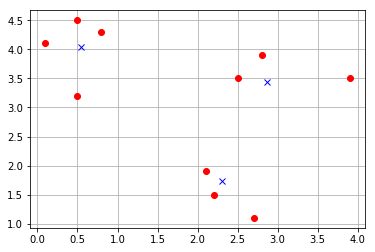

In [31]:
x = [temp[i][0] for i in range(len(temp))]
y = [temp[i][1] for i in range(len(temp))]
plt.plot(x,y,'ro')
x = [new_mean[i][0].item(0) for i in range(len(new_mean))]
y = [new_mean[i][1].item(0) for i in range(len(new_mean))]
plt.plot(x,y,'bx')
plt.grid()
plt.show()